In [1]:
import numpy as np                    
import matplotlib.pyplot as plt

%matplotlib inline                     

In [2]:
def read_genbank_file(seqfile):
    """Read one sequence from a Genbank-format file.

    Input:  <seqfile>: path to a Genbank format file containing one DNA sequence.
    Output: <seq>:     sequence, as a list of upper-case characters (typically A|C|G|T)

    If the sequence contains characters other than A|C|G|T, such as degeneracy codes like N|R|Y, these will still be included.
    """
    in_sequence = False
    seq         = []
    with open(seqfile) as f:
        for line in f:
            if   line.startswith('//'):     break
            elif in_sequence:               seq.extend( [ x.upper() for x in line if x.isalpha() ] )
            elif line.startswith('ORIGIN'): in_sequence = True
    return seq
    

In [3]:
line = '120 ACT gat'                # Forget all the Genbank file stuff. Make sure we can turn this one little line into list('ACTGAT').
print( type(line) )                 # The built-in method type() is your friend for figuring out what things are: here, line is a `str` class
L    = [x for x in line]            # Simple list comprehension. 
print( type(L) )                    # The result L is a list of the characters in `line`
print (L)      
L    = [ 'hey!' for x in line ]     # Nothing sacred about that first x. We can put anything into the new list as we iterate through `line`
print (L)
L    = [ x.upper() for x in line ]  # but usually it would be something to do with the `x` we're iterating over in line, of course
print (L)
L    = [ x.upper() for x in line if x.isalpha() ]   # and finally here's what we did to make the argument we passed to `seq.extend()`
print (L)
L    = list('ACTGAT')               # if it weren't for the numbers and spaces - converting a string to a list is easy with `list()`
print (L)


<class 'str'>
<class 'list'>
['1', '2', '0', ' ', 'A', 'C', 'T', ' ', 'g', 'a', 't']
['hey!', 'hey!', 'hey!', 'hey!', 'hey!', 'hey!', 'hey!', 'hey!', 'hey!', 'hey!', 'hey!']
['1', '2', '0', ' ', 'A', 'C', 'T', ' ', 'G', 'A', 'T']
['A', 'C', 'T', 'G', 'A', 'T']
['A', 'C', 'T', 'G', 'A', 'T']


In [4]:
def chaos_game(seq):
    """Given a DNA sequence, produce a chaos game representation, as a 2D array of coordinates

    Input:  <seq> : a list or array of A|C|G|T characters
    Output: 2D numpy array of shape (L x 2): array of 2D coords for each of L points

    Assumes that the <seq> list only contains A|C|G|T characters.
    """
    vertices = { 'A' : [0, 0], 'C': [0,1], 'G': [1,1], 'T': [1,0] }
    L = len(seq)

    data = np.zeros( (L,2) )
    data[0] = vertices[seq[0]]
    for i in range(1,L):
        data[i] = (data[i-1] + vertices[seq[i]]) / 2
    return data
    

In [5]:
D = np.array( [ [0.1, 0.1 ],       # Make a small example of the Lx2 array
                [0.2, 0.2 ], 
                [0.3, 0.3 ] ] )
vertex = np.array([0.5, 0.5])     # and an example vertex
print(type(D))                    # `D` is a numpy array
print(D.shape)                    #   ... of "shape" 3x2
print(type(D[1]))                 # `D[1]` is one row of the array.. but still just another numpy array
print(D[1].shape)                 #   ... now of shape 1x2, but since it's a vector, numpy interprets it as `2,`
print(type(vertex))               # `vertex` is also a numpy array
print(vertex.shape)               #   ... also of shape `2,`
r = D[1] + vertex                 # the two vectors have the same shape, so we can add them, elementwise
print (r)


<class 'numpy.ndarray'>
(3, 2)
<class 'numpy.ndarray'>
(2,)
<class 'numpy.ndarray'>
(2,)
[0.7 0.7]


In [6]:
L = [ 10, 20, 30 ]						         	# lists: initialization
D = { 'Holmes': 'postdoc', 'Watson': 'student' }  	# dicts: initialization
print(L[1])
print(D['Holmes'])
L.append(40)                              # append to the end of a list
print(L)
D['Wiggins'] = 'Baker Street Irregular'   # add element to a dict
print(D)

20
postdoc
[10, 20, 30, 40]
{'Holmes': 'postdoc', 'Watson': 'student', 'Wiggins': 'Baker Street Irregular'}


In [7]:
def plot_chaos(data):
    """Create a scatterplot figure from an Lx2 array of chaos game points

    Input <data>: Lx2 array of coords for L points
    Result:       an inline figure in our notebook
    """
    fig, ax = plt.subplots()                                                # Creates Figure, Axes objects to plot in
    ax.scatter(data[:,0], data[:,1], s=0.1, marker='.', color='black')      # scatter plot with black points of size 0.1

    ax.text(0, 1, 'C', horizontalalignment='right')                         # here we're labeling A,C,G,T vertices
    ax.text(1, 1, 'G')
    ax.text(0, 0, 'A', verticalalignment='top', horizontalalignment='right')
    ax.text(1, 0, 'T', verticalalignment='top')

    ax.axis('equal')      # make sure the plot is shown as a square, not a rectangle
    ax.set_axis_off()     # turn off everything associated with the axes: tick marks, labels, spines

    fig.tight_layout()    # tighten margins, reduce unnecessary white space


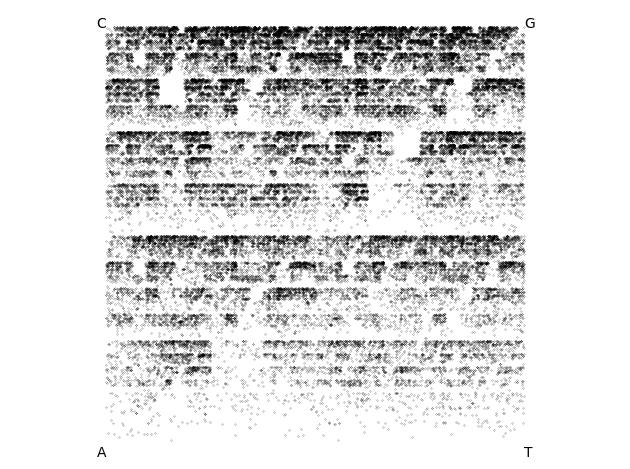

In [8]:
seq = read_genbank_file('BabyGotBac.gb')
D   = chaos_game(seq)
plot_chaos(D)

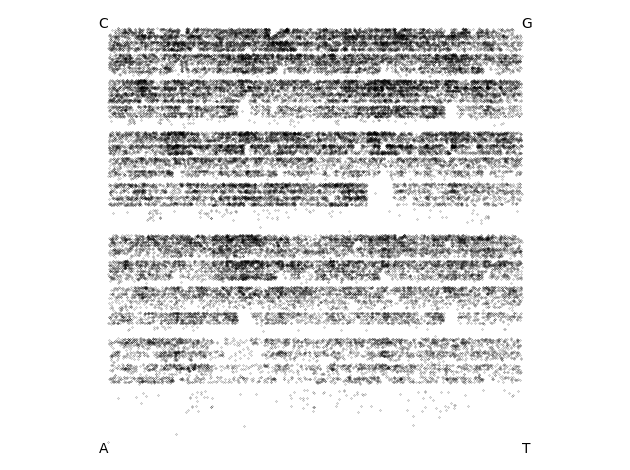

In [9]:
seq = read_genbank_file('Dwayne.gb')
D   = chaos_game(seq)
plot_chaos(D)

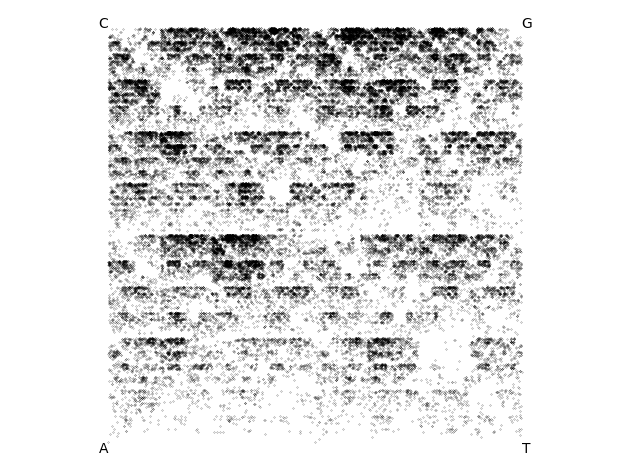

In [10]:
seq = read_genbank_file('Tiamoceli.gb')
D   = chaos_game(seq)
plot_chaos(D)

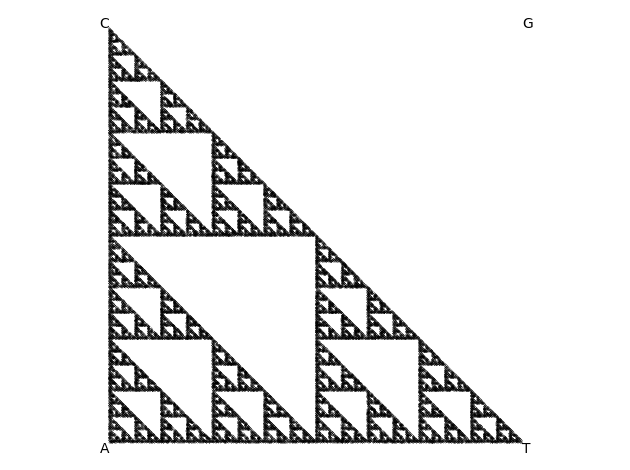

In [11]:
seq = np.random.choice(list('ACT'), size=(50000))
D   = chaos_game(seq)
plot_chaos(D)

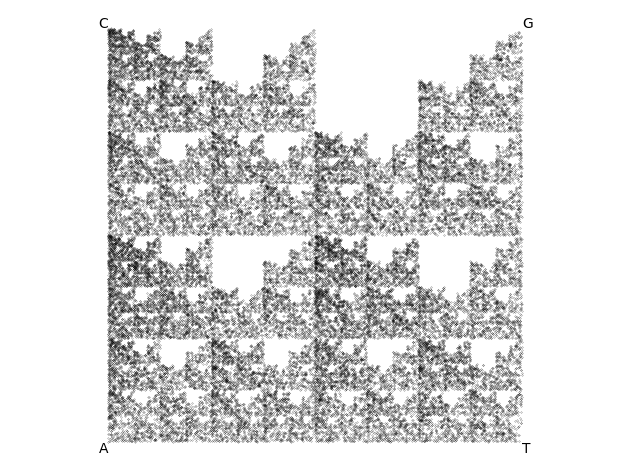

In [12]:
p = [ [ 0.25, 0.25, 0.25, 0.25 ],   # P(x | A), where x = {A,C,G,T}.
      [ 1/3,  1/3,  0.0,  1/3  ],   # P(x | C) ... here I've set P(G|C) = 0 to disallow CpG dinucs
      [ 0.25, 0.25, 0.25, 0.25 ],   # and so on
      [ 0.25, 0.25, 0.25, 0.25 ],
    ]
alphabet = list('ACGT')
L        = 50000

seq = ['A']   # I could've been more random about choosing the initial nucleotide... but let's just make it an A,
prv = 0       # it doesn't matter for this visualization, the other 49,999 points dominate the view
for i in range(1,L):
    cur = np.random.choice(4, p=p[prv])     # The p= optional argument to np.random.choice() lets me provide my own probabilities
    seq.append(alphabet[cur])               # <cur>, <prv> are integers 0..3, so I have to convert to an A|C|G|T letter with alphabet[cur]
    prv = cur

D = chaos_game(seq)
plot_chaos(D)


In [ ]:
kmer     = list('CCAG')
new_kmer = list('TTTT')
k        = len(kmer)
L        = 50000
seq      = list(np.random.choice(list('ACGT'), size=(50000)))

for i in range(L-k+1):
    if seq[i:i+4] == kmer: seq[i:i+4] = new_kmer

D = chaos_game(seq)
plot_chaos(D)
    

In [ ]:
seq = list('CCAG') * 10000
D = chaos_game(seq)
plot_chaos(D)